In [1]:
import pandas as pd
import gensim
import numpy as np
from gensim.models import Word2Vec
from time import time  # To time our operations
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

data = pd.read_json("preprocessingDoneRight.json")

E:\Anaconda\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#sentences = data[data["year"] == 2016]["modded1_stemmed"].tolist()
sentences = data[data["year"] == 2016]["modded1"].tolist()
#sentences = data["modded1_stemmed"].tolist()
sentences

['foxnews live members family 1150 pm ring new year together make america great',
 'happy new year amp thank',
 'happy new year thank great family support',
 'jallenaip hillary said fog war explanation lies benghazi fog allowed wh vote trump potus',
 'sprinklermanus cnn realdonaldtrump theyre spending millions youre still going win go donald trump',
 'well year officially begun many stops planned working hard win turn country around',
 'marie7777777777 realdonaldtrump love u trump family god bless',
 'jodil792 standing spreading wordtrump president 2016 wake amp sleep praying amp usaisrael2',
 'memeoryhead im one biggest fans mr trump cant wait make america great ifagain never forget support',
 'casuperrunner huckabee good manbut needs get behind realdonaldtrump agree',
 'going mississippi tomorrow night hear crowds going massive look forward',
 'codyraymille never interested politics want get political science degree trump2016 great',
 'person hillary clinton least wants run far large

In [3]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sentences)]
tagged_data

[TaggedDocument(words=['foxnews', 'live', 'members', 'family', '1150', 'pm', 'ring', 'new', 'year', 'together', 'make', 'america', 'great'], tags=['0']),
 TaggedDocument(words=['happy', 'new', 'year', 'amp', 'thank'], tags=['1']),
 TaggedDocument(words=['happy', 'new', 'year', 'thank', 'great', 'family', 'support'], tags=['2']),
 TaggedDocument(words=['jallenaip', 'hillary', 'said', 'fog', 'war', 'explanation', 'lies', 'benghazi', 'fog', 'allowed', 'wh', 'vote', 'trump', 'potus'], tags=['3']),
 TaggedDocument(words=['sprinklermanus', 'cnn', 'realdonaldtrump', 'theyre', 'spending', 'millions', 'youre', 'still', 'going', 'win', 'go', 'donald', 'trump'], tags=['4']),
 TaggedDocument(words=['well', 'year', 'officially', 'begun', 'many', 'stops', 'planned', 'working', 'hard', 'win', 'turn', 'country', 'around'], tags=['5']),
 TaggedDocument(words=['marie7777777777', 'realdonaldtrump', 'love', 'u', 'trump', 'family', 'god', 'bless'], tags=['6']),
 TaggedDocument(words=['jodil792', 'standing'

In [4]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)


E:\Anaconda\lib\site-packages\gensim\models\doc2vec.py:535: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [5]:
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha



iteration 0


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [ ]:
test_data = word_tokenize("mexico wall year great country")

v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.docvecs.most_similar("1")
print(similar_doc)


# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.docvecs['1'])



In [6]:
from sklearn.metrics import silhouette_score

start_alpha=0.01
infer_epoch=1000

X=[]
for d in sentences:
    X.append( model.infer_vector(d, alpha=start_alpha, steps=infer_epoch) )

# BIRCH

In [ ]:
scores = []
for k in range(2,10):
    print(k)
    from sklearn.cluster import Birch

    brc = Birch(branching_factor=50, n_clusters=k, threshold=0.1, compute_labels=True)
    brc.fit(X)

    clusters = brc.predict(X)

    labels = brc.labels_

    #print ("Clusters: ")
    #print (clusters)
    m = silhouette_score(X, labels, metric="euclidean")
    scores.append(m)
    print ("Silhouette_score: ")
    print (k, m)

#silhouette
#0.140 noStop_modded   5 cluster
#0.169 stemmed (no counted)
#0.118 temmed_counted

#silhouette with new preprocessing
#0.135 k = 2/4/5 stemmed
#0.284 k = 2, 1.55 k = 3 not stemmed 

#silhouette su dataset intero non ha senso 


In [ ]:
from sklearn.cluster import Birch

brc = Birch(branching_factor=50, n_clusters=k, threshold=0.1, compute_labels=True)
brc.fit(X)

clusters = brc.predict(X)

labels = brc.labels_

#print ("Clusters: ")
#print (clusters)
m = silhouette_score(X, labels, metric="euclidean")
scores.append(m)
print ("Silhouette_score: ")
print (k, m)

# KMEANS

In [19]:
#try some clustering 
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


In [18]:
kmeans = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
kmeans.fit(X)
print(kmeans.inertia_)

d = silhouette_score(X, kmeans.labels_,metric='euclidean')
print(d)

ImportError: cannot import name 'NearestNeighbors'

# DBSCAN

In [62]:
clustering = DBSCAN(eps=10, min_samples=2).fit(X)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
d = silhouette_score(X, labels,metric='euclidean')
print(d)

#data1 = data[data["year"] == 2016]
#data1["labels"] = labels
#data1

Estimated number of clusters: 16


E:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


-0.1692938


In [76]:
nbrs = NearestNeighbors(n_neighbors=5).fit(X)
distances, indices = nbrs.kneighbors(X)
distances

array([[ 0.        ,  9.8653411 , 10.23470224, 10.68351269, 10.82462247],
       [ 0.        ,  7.44082153,  8.30760224,  8.4580894 ,  8.6975066 ],
       [ 0.        ,  5.42946039,  5.79868931,  7.03423441,  7.08201052],
       ...,
       [ 0.        ,  6.01448545,  6.80644495,  7.88456403,  8.08785507],
       [ 0.        ,  6.33276434, 11.81278639, 12.65568912, 12.66456307],
       [ 0.        ,  6.33276434,  9.46869915,  9.63823004, 10.37231922]])

In [77]:
distances.mean()

5.592054591653111

In [78]:
c = []
for el in distances:
    l = len(el)- 1
    c.append(el[l])
c.sort(reverse=True)
c

[21.713149253646,
 18.96978676750709,
 18.78248381790162,
 18.764935273993405,
 18.31083942887587,
 17.83115692428086,
 17.676077744295647,
 17.532184815868543,
 17.306245635334268,
 17.024834833130722,
 16.774363798249507,
 16.153710720657372,
 16.01773398619637,
 15.988559036137566,
 15.93215863663068,
 15.83315169034347,
 15.80872563244221,
 15.778758860093923,
 15.654207271872743,
 15.620996715810406,
 15.40651778562437,
 15.314438728153384,
 15.231542837619145,
 15.109085135163657,
 15.006767455507426,
 14.966931932982831,
 14.851129798110108,
 14.731045167919655,
 14.664138275526842,
 14.64012301084389,
 14.588212488460185,
 14.526340812073006,
 14.491489124096997,
 14.452260605984563,
 14.374086557836199,
 14.302513388718369,
 14.286028114430625,
 14.282166670617142,
 14.197205199187099,
 14.173632096128893,
 14.1708714027217,
 14.15072039724251,
 14.132225624903931,
 14.089672226477514,
 14.068703722422946,
 14.059654007358056,
 13.884922537355529,
 13.84776162897352,
 13.77301

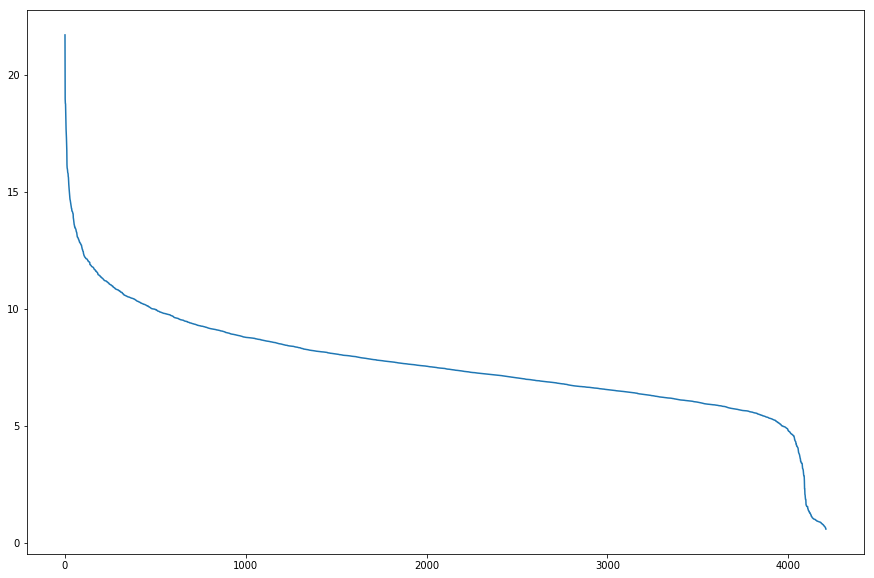

In [80]:
import matplotlib.pyplot as plt

l = [x for x in range(0,len(c))]
fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(l, c)
plt.show()


In [88]:
n = np.linspace(10,12,10)

for i in n:
    clustering = DBSCAN(eps=i, min_samples=4).fit(X)
    labels = clustering.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    d = silhouette_score(X, labels,metric='euclidean')
    print(i,d)


Estimated number of clusters: 4


E:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


10.0 -0.064108215
Estimated number of clusters: 2


E:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


10.222222222222221 0.07160162
Estimated number of clusters: 3


E:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


10.444444444444445 0.04786886
Estimated number of clusters: 1


E:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


10.666666666666666 0.2152504
Estimated number of clusters: 1


E:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


10.88888888888889 0.22403003


KeyboardInterrupt: 

In [81]:

for i in range(9,14):
    clustering = DBSCAN(eps=i, min_samples=4).fit(X)
    labels = clustering.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    d = silhouette_score(X, labels,metric='euclidean')
    print(i,d)


Estimated number of clusters: 6


E:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


9 -0.07610676
Estimated number of clusters: 4


E:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


10 -0.064108215
Estimated number of clusters: 1


E:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


11 0.22754069
Estimated number of clusters: 1


E:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


12 0.2585434
Estimated number of clusters: 1
13 0.29788694


E:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
